### Introduction

Sympy is a library for symbolic mathematics. Meaning that every expression is expressed with symbols and in its variables it does not store values.

Its aims to become a full featured computer algebra system (CAS) library ( similar Wolfram ).

In [1]:
import sympy as sp

Use sp.init_printing to enable pretty print when used at the terminal.

In [2]:
sp.init_printing(use_unicode=True)

<pre>&gt;&gt;&gt; import sympy as sp
&gt;&gt;&gt; x = sp.symbols( &quot;x&quot; )
&gt;&gt;&gt; sp.Integral( sp.sin(x) )
Integral(sin(x), x)
&gt;&gt;&gt; sp.init_printing(use_unicode=True)
&gt;&gt;&gt; sp.Integral( sp.sin(x) )
⌠          
⎮ sin(x) dx
⌡          
&gt;&gt;&gt; 
</pre>

### Symbolic computations

In [3]:
import math

When evaluating expressions we lose information

In [4]:
math.sqrt(5)

In [5]:
sp.sqrt(5)

In [6]:
import graphviz
from graphviz import Source

In [7]:
x, y = sp.symbols( "x y" )

In [8]:
expr = x**2 + 10*x + y**10 + 5*y

In [9]:
expr

In [10]:
expr.subs( x, 5)

In [11]:
expr.subs( x, 5).subs( y, 1 )

In [12]:
expr.subs( [ (x,5), (y,1) ]  )

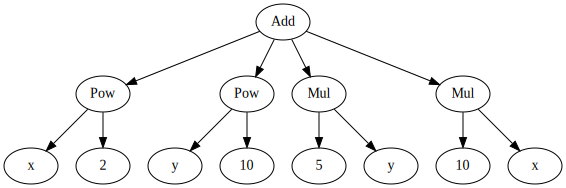

In [13]:
Source( sp.dotprint( expr ) )

### Factor

$$ (x^2 + 2x + 1)$$

In [14]:
expr1 = x**2 + 2*x + 1

In [15]:
expr1

In [16]:
expr1.factor()

### Simplify

$$sin(x)^2 + cos(x)^2 = 1$$

In [17]:
expr2 = sp.sin(x)**2 + sp.cos(x)**2

In [18]:
expr2

In [19]:
expr2.simplify()

### Expand

In [20]:
expr3 = ( x + y )**3

In [21]:
expr3

In [22]:
expr3.expand()

Exercise:

Factor the expression below

$$\frac{ x^3 - 3x^2 + 3x - 1 }{ x^2 + 2x + 1 }$$

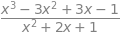

In [23]:
expr = ( x ** 3 - 3 * x**2 + 3 * x - 1 ) / (  x**2 + 2*x + 1 )
expr

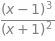

In [24]:
expr.factor()

### Partial fraction decomposition

$$\frac{ 1 }{ x^2 + 2x + 1 } = \frac{A}{x-1} + \frac{B}{x-2}$$

In [25]:
expr = 1 / ( x**2 - 3*x + 2 )

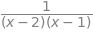

In [26]:
expr.factor()

In [27]:
expr.apart()

Exercise:

Execute apart on

$$\frac{ 5x + 3 }{ x^2 + x }$$

In [28]:
expr = ( 5*x + 3 ) / ( x**2 + x )

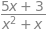

In [29]:
expr

In [30]:
expr.apart()

Similarly there are simplify/expand functions for trigonometric functions or logarithms

In [31]:
sp.sin(x)**2 + sp.cos(x)**2

In [32]:
sp.trigsimp( sp.sin(x)**2 + sp.cos(x)**2 )

In [33]:
a, b = sp.symbols( "a b", positive=True )

In [34]:
expr = sp.log(a * b )

In [35]:
expr

In [36]:
sp.expand_log( expr )

In [37]:
expr2 = sp.log( a/ b )

In [38]:
expr2

In [39]:
sp.expand_log( expr2 )

In [40]:
expr = sp.log(a) - sp.log(b)

In [41]:
expr

In [42]:
sp.logcombine( expr )

Powers

In [43]:
x, a, b = sp.symbols( "x a b" )
sp.powsimp( x**a * x**b )

In [44]:
sp.expand_power_exp( x**(a+b) )

### Solve equation

In [45]:
from IPython.display import display, Math

In [46]:
x = sp.symbols( "x" )

In [47]:
eq = sp.Eq( x**2, 5 )
display(eq)
sp.solve( eq )

In [48]:
x = sp.symbols( "x", integer=True )
eq = sp.Eq( x**2 - 5, 0 )
display(eq)
sp.solve( eq )

In [49]:
x, y = sp.symbols( "x y", integer=True )
eq1 = sp.Eq( 4*x + 2*y, 8 )
eq2 = sp.Eq( 5*x + 3*y, 9 )

display(eq1)
display(eq2)

sp.solve( (eq1, eq2) )

In [50]:
4 * (3) + 2*(-2)

In [51]:
5*(3) + 3*(-2)

### Non-linear equation

In [52]:
x, y = sp.symbols( "x y" )

$$6x^2 + 3y^2 - 12 = 0$$
$$ x + y - 2 = 0 $$

In [53]:
sp.nonlinsolve(  [ 6 * x**2 + 3*y**2 - 12, x + y - 2 ], [x,y] )

### Assumptions

Queries are used to ask information about expressions. E.x. is it positive? negative? even?, odd?, composite? etc

In [54]:
print( sp.ask( sp.Q.even( 0    )  ) )
print( sp.ask( sp.Q.even( 2 )  ) )
print( sp.ask( sp.Q.even( 3 )  ) )
print( sp.ask( sp.Q.even( sp.pi )  ) )

True
True
False
False


In [55]:
sp.ask( sp.Q.finite( sp.oo )  )

False

In [56]:
sp.ask( sp.Q.finite( 1 )  )

True

In [57]:
sp.ask( sp.Q.composite( 3*5*7 )  )

True

In [58]:
sp.ask( sp.Q.composite( 3 )  )

False

In [59]:
sp.ask( sp.Q.imaginary( 15 + sp.I )  )

False

In [60]:
sp.ask( sp.Q.real( 15 )  )

True

In [61]:
sp.ask( sp.Q.imaginary( sp.I )  )

True

In [62]:
sp.ask( sp.Q.positive( 5-10 ) )

False

In [63]:
sp.ask( sp.Q.negative( 5-10 ) )

True

In [64]:
sp.ask( sp.Q.complex( 16 + sp.I ))

True

### Derivatives

In [65]:
x, y = sp.symbols( "x y" )

In [66]:
expr = x**2 + 10*x + y**10 + 5*y
display( expr )

To get the unevaluate expression use sp.Derivative. To get the result of the derivative use sp.diff.
Note later that capital letters in sympy will be used to get unevaluated results for integrals or limits as well.

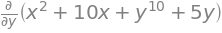

In [67]:
sp.Derivative( expr, y )

In [68]:
sp.diff( expr, y )

In [69]:
expr = x**2 + 10*x + y**10 + 5*y

In [70]:
expr

In [71]:
sp.Derivative(expr,x)

In [72]:
sp.diff( expr, x )

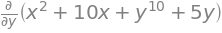

In [73]:
sp.Derivative(expr,y)

In [74]:
sp.diff( expr, y )

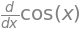

In [75]:
sp.Derivative( sp.cos(x), x )

In [76]:
sp.diff( sp.diff( sp.diff( sp.cos(x), x ), x ), x )

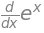

In [77]:
sp.Derivative( sp.exp(x),x)

In [78]:
sp.diff( sp.exp(x) )

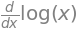

In [79]:
sp.Derivative( sp.log(x), x )

In [80]:
sp.log(x).diff(x).diff(x).diff(x)

In [81]:
f = sp.symbols( "f", cls=sp.Function )

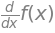

In [82]:
f(x).diff(x)

To get 2nd order derivative or greater use nested functions or specify ( function, w.r.t. variable, order )

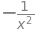

In [83]:
sp.diff( sp.diff( sp.log(x) ) )

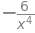

In [84]:
sp.diff( sp.log(x), x, 4 )

### Integration

Indefinite integral

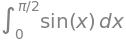

In [85]:
x, a, b = sp.symbols("x a b")
sp.Integral( sp.sin(x), (x,0,sp.pi/2) )

In [86]:
sp.integrate( sp.sin(x),(x,0,sp.pi/2) )

Define limits

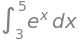

In [87]:
sp.Integral( sp.exp(x), (x,3,5) )

In [88]:
sp.integrate( sp.exp(x), (x,3,5) )

Double integral

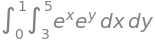

In [89]:
y = sp.symbols("y")
sp.Integral( sp.exp(x) * sp.exp(y), (x,3,5), (y,0,1) )

In [90]:
sp.integrate( sp.exp(x) * sp.exp(y), (x,3,5), (y,0,1) )

### Limits

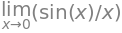

In [91]:
sp.Limit( sp.sin(x)/x, x, 0, '+-' )

In [92]:
sp.limit( sp.sin(x)/x, x, 0, '+-' )

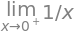

In [93]:
sp.Limit( 1/x, x, 0, '+' )

In [94]:
sp.limit( 1/x, x, 0, '+' )

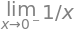

In [95]:
sp.Limit( 1/x, x, 0, '-' )

In [96]:
sp.limit( 1/x, x, 0, '-' )

### Series

#### Maclaurin
When derivatives are evaluated at 0, the Taylor series is also called Maclaurin.

In [97]:
x = sp.symbols( "x" )
f = sp.sin(x)
f

To get the Taylor series use the method series

In [98]:
f.series()

To get more terms specify the 3rd argument

In [99]:
f.series(x,0,10)

In [100]:
f.series(x,0,20)

#### Taylor

In [101]:
x = sp.symbols( "x" )
f = sp.sin(x)
f

In [102]:
f.series(x,5)

In [103]:
f.series(x,5,10)